# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Tsaqif Mu'tashim Mufid
- **Email:** mufidmutashim@gmail.com
- **ID Dicoding:** mc0dex

## Menentukan Pertanyaan Bisnis

- Kategori roduk apa yang memiliki penjualan tertinggi dan terendah?
- Bagaimana tren jumlah pesanan dari waktu ke waktu berdasarkan tahunan?
- Metode pembayaran apa yang paling populer di kalangan pelanggan?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering pelanggan melakukan banyak transaksi?
- Berapa banyak yang biasanya dihabiskan oleh seorang pelanggan dalam satu transaksi?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import streamlit as st
import datetime as dt

## Data Wrangling

### Gathering Data

In [4]:
# Data customer
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight Data Costumers:**
- Dari data yang didapatkan terdapat 5 kolom yaitu `customer_id`, `customer_unique_id`, `customer_zip_code_prefix`, `customer_city`, `customer_state`.
- Data consumer ini menjadi dasar acuan untuk nantinya yang akan dijadikan dalam penyatuan dalam menjawab pertanyaan bisnis yang sudah di definisikan sebelumnya.

In [5]:
# Data orders
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


**Insight Data Orders:**
- Karena ada table `customer_id` yang saling berkaitan antara data Customers terhadap Orders khususnya `order_id`.
- Data ini juga merupakan data pendukung untuk menjawab kebutuhan pertanyaan bisnis.

In [6]:
# Data orders_item
order_item_df = pd.read_csv("data/order_items_dataset.csv")
order_item_df


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


**Insight Data Orders Item:**
- Sama halnya seperti sebelumnya, karena tujuan kita untuk mengetahui produk mana yang memiliki penjualan tertinggi dan terendah perlu adanya data dari Orders Item khususnya tabel yang saling berkaitan antara `order_id` terhadap `product_id`.
- Data ini juga merupakan data pendukung untuk mengetahui capaian dari pertanyaan bisnis.

In [7]:
# Data products
products_df = pd.read_csv("data/products_dataset.csv")
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


**Insight Data Products:**
- `product_id` menjadi kunci untuk menjawab pertanyaan bisnis, karena nantinya data yang dimiliki akan digabungkan sehingga akan menjawab pertanyaan bisnis.
- Data ini merupakan pendukung paling vital.

In [8]:
# Data terjemahan kategori
products_category_translate_df = pd.read_csv("data/product_category_name_translation.csv")
products_category_translate_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


**Insight Data Terjemahan Kategorit:**
- Karena produk tidak menggunakan bahasa universal, maka data ini akan menjadi acuan untuk mengetahui produk mana yang berkaitan dengan pertanyaan bisnis khususnya pada tabel `product_category_name`.
- Data ini merupakan pendukung bisnis.

In [9]:
# Data orders_payment
orders_payment_df = pd.read_csv("data/order_payments_dataset.csv")
orders_payment_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


**Insight Data Orders Payment:**
- Data ini merupakan acuan untuk mengetahui pembayaran mana yang paling sering digunakan terhadap tabel `order_id`.
- Data ini merupakan titik vital untuk menjawab pertanyaan bisnis

### Assessing Data

In [ ]:
# Cek data kosong pada data customer
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Customers, sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [ ]:
# Cek data kosong pada data orders
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- Ditemukan nilai null dalam data Orders khususnya pada tabel `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`. Sehingga perlu dilakukan data cleaning terkait missing values.

In [ ]:
# Cek data kosong pada order_item_df
order_item_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Orders_Item, sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [ ]:
# Cek data kosong pada data products
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- Ditemukan nilai null dalam data keseluruhan Products kecuali `product_id`. Sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [ ]:
# Cek data kosong pada products_category_translate_df
products_category_translate_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Product_Category, sehingga tidak perlu dilakukan data cleaning terkait missing values.

In [ ]:
# Cek data kosong pada data orders_payment
orders_payment_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Insight:**
- Tidak ditemukan nilai null dalam data Orders_Payment, sehingga tidak perlu dilakukan data cleaning terkait missing values.

### Cleaning Data

In [ ]:
# Drop missing values
orders_df.dropna(axis=0, inplace=True)

In [ ]:
# Cek data yang kosong
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

**Insight:**
- Metode cleaning data yang dipakai yaitu Dropping `.dropna()` karena semua fitur yang tidak berkaitan akan beresiko jika menggunakan metode Imputation `.fillna()` dan juga Interpolation `.interpolate()`.

In [ ]:
# Hapus data yang missing value
products_df.dropna(axis=0, inplace=True)

In [ ]:
# Cek missing value
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Insight:**
- Metode cleaning data yang dipakai yaitu Dropping `.dropna()` karena semua fitur yang tidak berkaitan akan beresiko jika menggunakan metode Imputation `.fillna()` dan juga Interpolation `.interpolate()`.

## Exploratory Data Analysis (EDA)

### Explore Customers

In [ ]:
# Deskripsi data
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
# Melihat nunber of unique values dari customer_zip_code_prefix
customers_df['customer_zip_code_prefix'].nunique()


14994

In [ ]:
# Melihat 10 kode pos terbanyak
customers_df['customer_zip_code_prefix'].value_counts().head(10)


customer_zip_code_prefix
22790    142
24220    124
22793    121
24230    117
22775    110
29101    101
13212     95
35162     93
22631     89
38400     87
Name: count, dtype: int64

**Insight:**
- Dari data Customers, satu-satunya informasi numerik yang bisa dianalisis secara statistik adalah `customer_zip_code_prefix`. 
- Terdapat 14.994 kode pos unik, menunjukkan penyebaran pelanggan yang luas.
- Kode pos dengan jumlah pengiriman terbanyak adalah 22790, yang mungkin menunjukkan area dengan konsentrasi pelanggan atau aktivitas e-commerce yang tinggi.


### Explore Orders

In [ ]:
# Merging data
all_orders_df = orders_df.merge(order_item_df, on='order_id', how='left').merge(orders_payment_df, on='order_id', how='left')
all_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115016,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1.0,credit_card,3.0,195.00
115017,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1.0,credit_card,5.0,271.01
115018,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16
115019,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16


In [ ]:
# Cek missing value
all_orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
dtype: int64

In [ ]:
# Hapus data yang missing value
all_orders_df.dropna(axis=0, inplace=True)

In [ ]:
# Cek missing value
all_orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

In [ ]:
# Deskripsi all_orders_df
all_orders_df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
count,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000,115018.000000
mean,1.196404,120.080129,19.995686,1.090699,2.936958,171.915654
std,0.699409,183.038922,15.744372,0.684409,2.772466,266.125730
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.190000
75%,1.000000,133.000000,21.180000,1.000000,4.000000,188.940000
max,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000


**Insight:**
- `order_item_id` merupakan jumlah item dalam sebuah order, dari data tersebut kita ketahui bahwa jumlah paling banyak pesanan mencapai 21 item tetapi rata-rata sekitar 1 item. 
- `price` merupakan harga dari suatu produk, terdapat produk bernilai tinggi yaitu 6735 dan terendah 0.85.
- `freight_value` merupakan biaya pengiriman, dari data rata-rata mendapat patokan harga sebesar 19.9.
- `payment_sequential` merupakan pembayaran secara berurutan. Dari data tersebut hampir semua pesanan dibayar dalam satu kali transaksi.
- `payment_installments` merupakan cicilan pembayaran.
- `payment_value` merupakan total pembayaran.

### Explore Products

In [ ]:
# Merging products_df dan products_category_translate_df
products_df = products_df.merge(products_category_translate_df, on='product_category_name', how='left')
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [29]:
# Ganti nama kolom product_category_name_english menjadi product_category
products_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

In [30]:
# Hapus kolom product_category_name jika tidak diperlukan
products_df.drop(columns=['product_category_name'], inplace=True)

In [31]:
products_df

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32335,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32336,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32337,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32338,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [32]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000,32340.000000
mean,48.476592,771.492393,2.188961,2276.956586,30.854545,16.958813,23.208596
std,10.245699,635.124831,1.736787,4279.291845,16.955965,13.636115,12.078762
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Data tersebut merupakan sebuah deskripsi dalam penjualan terhadap seller.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk apa yang memiliki penjualan tertinggi dan terendah?

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menggabungkan data produk dan order_item_df (pastikan data sudah ada di merged_data)
merged_data = pd.merge(order_item_df, products_df, on='product_id', how='left')

# Menghitung total penjualan per produk
merged_data['total_sales'] = merged_data['price'] * merged_data['order_item_id']

# Menghitung total penjualan per produk
total_sales_per_category = merged_data.groupby('product_category')['total_sales'].sum().reset_index()

# Mengurutkan kategori berdasarkan total penjualan
sorted_sales = total_sales_per_category.sort_values(by='total_sales', ascending=False)

# Mengambil produk dengan penjualan tertinggi dan terendah
highest_selling_product = sorted_sales.head(1)
lowest_selling_product = sorted_sales.tail(1)


C:\Users\mufid\AppData\Local\Temp\ipykernel_30204\304264514.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_category', data=sorted_sales.head(10), palette="Blues_d")


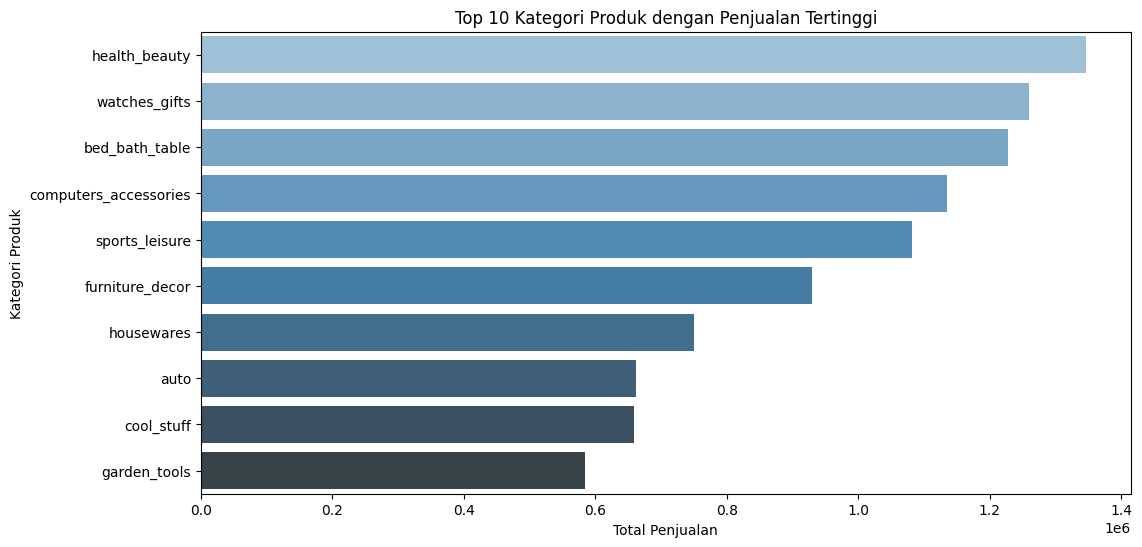

C:\Users\mufid\AppData\Local\Temp\ipykernel_30204\304264514.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales', y='product_category', data=sorted_sales.tail(10), palette="Reds_d")


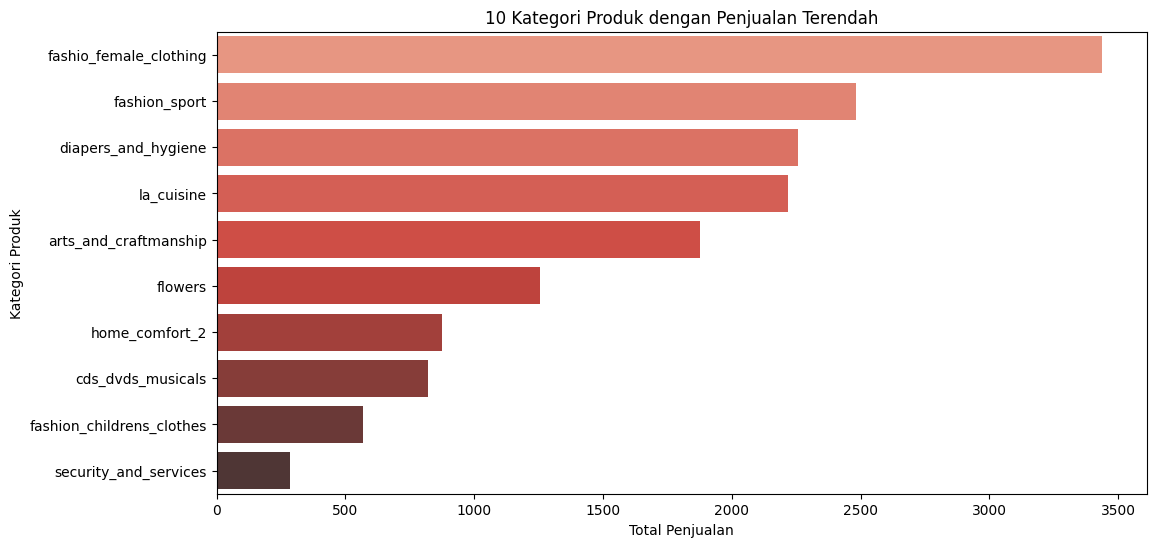

In [34]:
# Visualisasi Produk dengan Penjualan Tertinggi
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='product_category', data=sorted_sales.head(10), palette="Blues_d")

plt.title('Top 10 Kategori Produk dengan Penjualan Tertinggi')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

# Visualisasi Produk dengan Penjualan Terendah
plt.figure(figsize=(12, 6))
sns.barplot(x='total_sales', y='product_category', data=sorted_sales.tail(10), palette="Reds_d")

plt.title('10 Kategori Produk dengan Penjualan Terendah')
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori Produk')
plt.show()

### Pertanyaan 2: Bagaimana tren jumlah pesanan dari waktu ke waktu berdasarkan tahunan?

In [88]:
# Pastikan kolom order_purchase_timestamp dalam format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Ekstrak tahun dari timestamp
orders_df['order_year'] = orders_df['order_purchase_timestamp'].dt.year

# Hitung jumlah pesanan per tahun
orders_per_year = orders_df.groupby('order_year').size().reset_index(name='order_count')

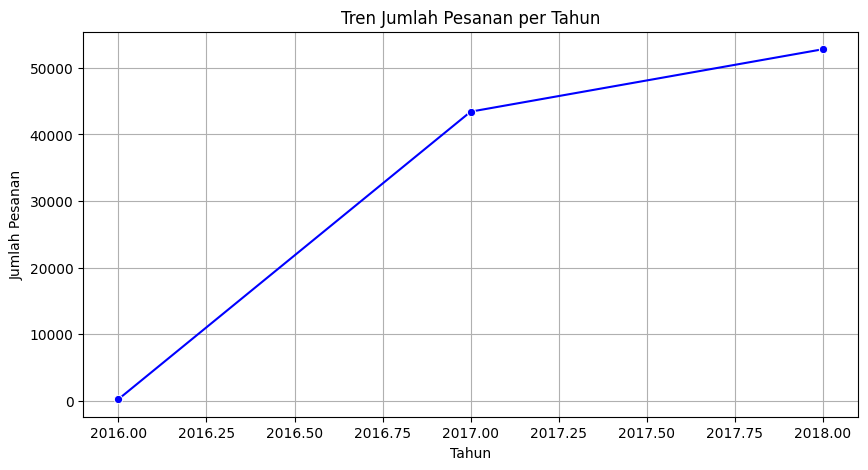

In [89]:
# Visualisasi tren jumlah pesanan tahunan
plt.figure(figsize=(10, 5))
sns.lineplot(x='order_year', y='order_count', data=orders_per_year, marker='o', color='b')

plt.title('Tren Jumlah Pesanan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pesanan')
plt.grid(True)
plt.show()

### Pertanyaan 3: Metode pembayaran apa yang paling populer di kalangan pelanggan?

In [37]:
# Hitung jumlah transaksi berdasarkan metode pembayaran
payment_counts = orders_payment_df['payment_type'].value_counts()

C:\Users\mufid\AppData\Local\Temp\ipykernel_30204\1312435489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')


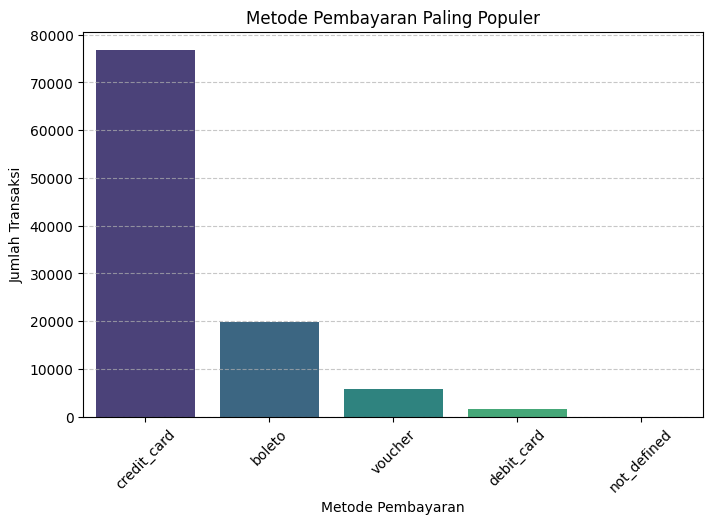

In [38]:
# Visualisasi dalam bentuk bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')

plt.title('Metode Pembayaran Paling Populer')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
### Q1: Kategori Produk Terlaris & Terendah
>  Dalam hasil dari Exploratory didapatkan bahwa order_item_df dan products_df memiliki satu keterkaitan yaitu `product_id`. Sehingga hasil yang diinginkan bisa terjawab dengan baik melalui pivot tabel antara `price` dikalikan dengan jumlah `order_item_id` menghasilkan beberapa kategori paling banyak terjual yaitu `health_beauty`, `watches_gifts` dan `bed_bath_table`. Sedangkan paling sedikit kategori yang terjual yaitu `security_and_services`.
### Q2: Tren Jumlah Transaksi (2016-2018)
> Terjadi peningkatan bertahap jumlah transaksi dari 2016 hingga 2018, dengan puncak tertinggi di tahun 2018.
### Q3: Metode Pembayaran Dominan
> Credit Card adalah metode pembayaran paling sering digunakan dalam transaksi.


In [82]:
# Merge all data into one dataframe
all_data = all_orders_df.merge(customers_df, on='customer_id', how='left').merge(products_df, on='product_id', how='left')

# Export data to CSV
all_data.to_csv('dashboard/main_data.csv', index=False)

## Analisis Lanjutan (Opsional)

In [51]:
# Konversi tanggal transaksi ke datetime
all_orders_df['order_purchase_timestamp'] = pd.to_datetime(all_orders_df['order_purchase_timestamp'])

# Tentukan tanggal referensi (misalnya, hari terakhir transaksi)
latest_date = all_orders_df['order_purchase_timestamp'].max()
print(f"Tanggal referensi: {latest_date}")

Tanggal referensi: 2018-08-29 15:00:37


In [52]:
# Grouping berdasarkan customer_id
rfm_df = all_orders_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
})

# Ganti nama kolom agar lebih jelas
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}, inplace=True)

# Lihat hasil
print(rfm_df.head())


                                  Recency  Frequency  Monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703      287          1    114.74
000161a058600d5901f007fab4c27140      409          1     67.41
0001fd6190edaaf884bcaf3d49edf079      547          1    195.42
0002414f95344307404f0ace7a26f1d5      378          1    179.35
000379cdec625522490c315e70c7a9fb      149          1    107.01


In [80]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,96460.000000,96460.000000,96460.000000
mean,239.099844,1.192391,204.990615
std,152.820769,0.732103,621.292808
min,0.000000,1.000000,9.590000
25%,115.000000,1.000000,62.657500
50%,220.000000,1.000000,109.500000
75%,349.000000,1.000000,195.540000
max,695.000000,63.000000,109312.640000


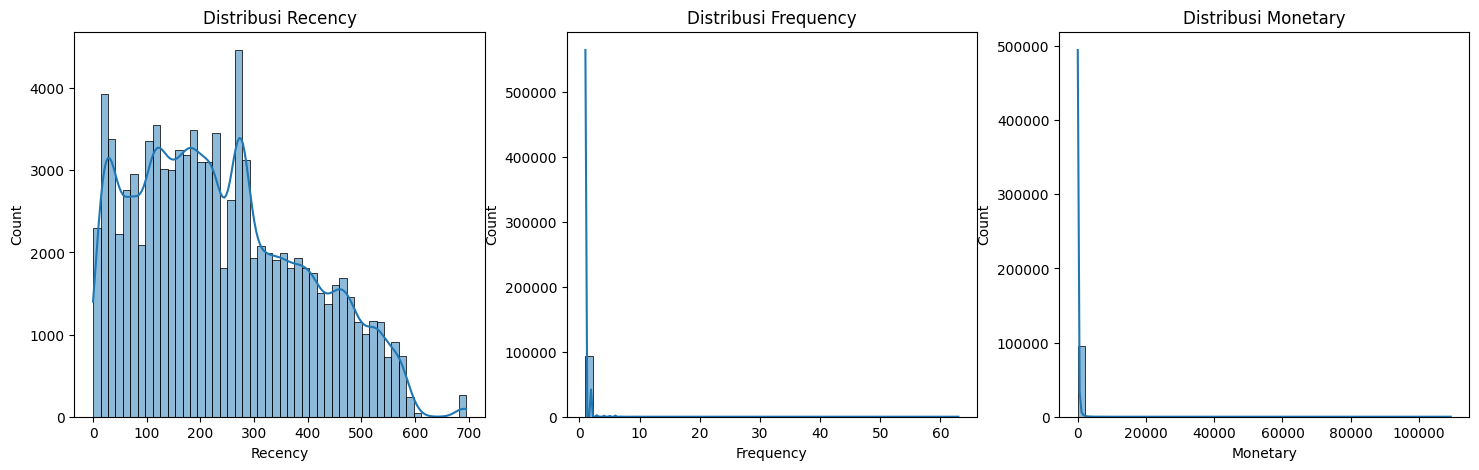

In [ ]:
# Visualisasi distribusi Recency, Frequency, dan Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm_df['Recency'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribusi Recency')

sns.histplot(rfm_df['Frequency'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribusi Frequency')

sns.histplot(rfm_df['Monetary'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('Distribusi Monetary')

plt.show()


In [ ]:
# Mengatasi jumlah nilai unik yang sedikit → rank(method="first") memastikan data tetap terurut unik.
rfm_df['R_Score'] = pd.cut(rfm_df['Recency'].rank(method="first"), bins=3, labels=[3, 2, 1])
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'].rank(method="first"), bins=3, labels=[1, 2, 3])
rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'].rank(method="first"), bins=3, labels=[1, 2, 3])

# Gabungkan skor menjadi RFM Score
rfm_df['RFM_Score'] = (
    rfm_df['R_Score'].astype(str) + 
    rfm_df['F_Score'].astype(str) + 
    rfm_df['M_Score'].astype(str)
)

rfm_df.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2,1,2,212,Hibernating
000161a058600d5901f007fab4c27140,409,1,67.41,1,1,1,111,Hibernating
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,3,113,Hibernating
0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,3,113,Hibernating
000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,2,312,Promising


In [ ]:
def segment_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r == 3 and f == 3 and m == 3:
        return 'Loyal Customers'
    elif r == 3 and (f < 3 or m < 3):
        return 'Promising'
    elif r < 3 and f >= 2 and m >= 2:
        return 'Customers Needing Attention'
    else:
        return 'Hibernating'

# Buat kolom baru untuk segmentasi
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Lihat hasil
print(rfm_df['Segment'].value_counts())


Segment
Hibernating                    34953
Customers Needing Attention    29353
Promising                      27258
Loyal Customers                 4896
Name: count, dtype: int64


C:\Users\mufid\AppData\Local\Temp\ipykernel_30204\1296900333.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='coolwarm')


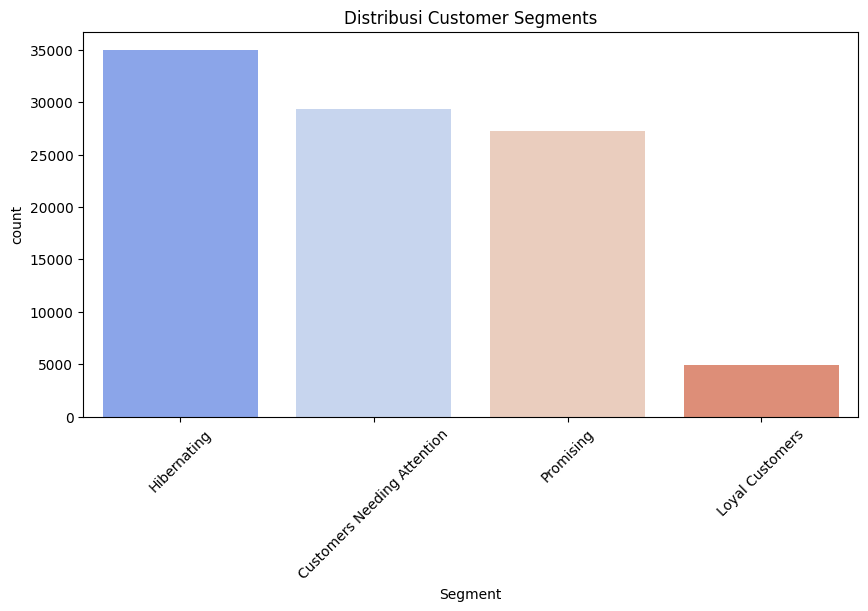

In [ ]:
# Visualisasi distribusi customer segments
plt.figure(figsize=(10,5))
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Distribusi Customer Segments')
plt.show()


**Insight:**

> Berdasarkan analisis Recency, Frequency, dan Monetary (RFM), transaksi terakhir tercatat pada 29 Agustus 2018 pukul 15:00:37. Rata-rata pelanggan hanya melakukan 1 kali transaksi, tetapi terdapat pelanggan yang bertransaksi hingga 63 kali. Dari sisi pengeluaran, mayoritas pelanggan memiliki pola belanja yang moderat, namun ada pelanggan dengan total pengeluaran tertinggi mencapai $109.312,64.

> Hasil segmentasi RFM Analysis menunjukkan bahwa pelanggan terbagi ke dalam empat segmen utama:

- Hibernating → 34.953 pelanggan
- Customers Needing Attention → 29.353 pelanggan
- Promising → 27.258 pelanggan
- Loyal Customers → 4.896 pelanggan

Penjelasan Segmen Pelanggan:

🔵 Hibernating → Pelanggan dalam segmen ini memiliki recency rendah (transaksi terakhir sudah lama), frequency rendah (jarang bertransaksi), dan monetary rendah (pengeluaran kecil). Mereka berisiko churn, sehingga diperlukan strategi re-engagement seperti diskon khusus atau kampanye email marketing.

🟠 Customers Needing Attention → Segmen ini mencakup pelanggan yang sebelumnya cukup aktif, tetapi dalam beberapa waktu terakhir tidak melakukan transaksi. Frekuensi dan total belanja mereka bervariasi, tetapi tingkat recency semakin menurun. Strategi retensi dapat dilakukan melalui pengingat transaksi, penawaran eksklusif, atau program loyalitas.

🟡 Promising → Pelanggan dalam segmen ini masih memiliki keterlibatan yang cukup baik. Mereka mulai bertransaksi baru-baru ini, tetapi belum terlalu sering. Peluang konversi menjadi pelanggan loyal masih terbuka, sehingga dapat diberikan insentif pembelian kedua, program referral, atau promosi eksklusif.

🟢 Loyal Customers → Segmen ini terdiri dari pelanggan terbaik dengan frequency dan monetary tinggi serta recency yang baik. Mereka sering bertransaksi dan berkontribusi besar terhadap pendapatan. Strategi utama adalah mempertahankan loyalitas mereka dengan penawaran VIP, early access ke produk baru, atau reward eksklusif.

- Referensi: 
>https://youtu.be/5BgAfG4e1wY?si=oCjrzh-Xt_EVjt_E 

>https://www.kaggle.com/code/canaazizatulakbar/customer-segementation-recommendation-system#2.9.-Category-Translation-Dataset

## Conclusion

- Behavior pelanggan dalam belanja online mengalami peningkatan signifikan dari tahun 2016 hingga 2018. Dominasi pembelian terjadi pada kategori kesehatan & kecantikan (health_beauty), hadiah & jam tangan (watches_gifts), serta perlengkapan rumah (bed_bath_table). Sebaliknya, kategori dengan penjualan terendah adalah fashion pakaian wanita (fashion_female_clothing). Selain itu, Credit Card menjadi metode pembayaran paling dominan.
- Segmentasi pelanggan ini membantu dalam menyusun strategi pemasaran yang lebih efektif, sehingga pendekatan kepada setiap kelompok pelanggan dapat disesuaikan untuk meningkatkan retensi dan pertumbuhan bisnis.